In [1]:
!pip install unidecode

# Data Structures
import numpy  as np
import pandas as pd
import json
# Corpus Processing
import re
import nltk
import nltk.corpus
from nltk.tokenize                    import word_tokenize
from nltk                             import SnowballStemmer
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.preprocessing            import normalize
from unidecode import unidecode
# K-Means
from sklearn import cluster
# hierarchical 
from sklearn.cluster import AgglomerativeClustering

# Visualization and Analysis
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score
from wordcloud                        import WordCloud


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 KB 3.3 MB/s eta 0:00:00


In [2]:
#from google.colab import files
#uploaded = files.upload()

In [3]:
import pandas as pd
#df = pd.read_csv("scraped_pattern_data_gofpatterns.csv")
df = pd.read_csv("GoF problem domain (complete).csv")
#df = df.drop([0, 1, 2, 3])
df = df.drop_duplicates(subset=['name'])

In [4]:
#df['overview'] = df['intent'] + " " + df['problem'] + " " + df['discussion'] + " " + df['structure']
df['overview'] = df['intent'] + " " + df['motivation'] + " " + df['applicability']
df.head()

,name,intent,motivation,applicability,Unnamed: 4,overview
0,abstract factory,Provide an interface for creating families of ...,Consider a user interface toolkit that support...,Use the Abstract Factory pattern when\n\n• a s...,NaN,Provide an interface for creating families of ...
1,builder,Separate the construction of a complex object ...,A reader for the RTF (Rich Text Format) docume...,Use the Builder pattern when\n\n• the algorith...,NaN,Separate the construction of a complex object ...
2,factory method,"Define an interface for creating an object, bu...",Frameworks use abstract classes to define and ...,Use the Factory Method pattern when\n\n• a cla...,NaN,"Define an interface for creating an object, bu..."
3,prototype,Specify the kinds of objects to create using a...,You could build an editor for music scores by ...,Use the Prototype pattern when a system should...,NaN,Specify the kinds of objects to create using a...
4,singleton,"Ensure a class only has one instance, and prov...",It’s important for some classes to have exactl...,Use the Singleton pattern when\n\n• there must...,NaN,"Ensure a class only has one instance, and prov..."


In [5]:
# removes a list of words (ie. stopwords) from a tokenized list.
def removeWords(listOfTokens, listOfWords):
    return [token for token in listOfTokens if token not in listOfWords]

# applies stemming to a list of tokenized words
def applyStemming(listOfTokens, stemmer):
    return [stemmer.stem(token) for token in listOfTokens]

# removes any words composed of less than 2 or more than 21 letters
def twoLetters(listOfTokens):
    twoLetterWord = []
    for token in listOfTokens:
        if len(token) <= 2 or len(token) >= 21:
            twoLetterWord.append(token)
    return twoLetterWord

In [6]:
nltk.download('stopwords')
def processCorpus(corpus, language):   
    stopwords = nltk.corpus.stopwords.words(language)
    param_stemmer = SnowballStemmer(language)
    
    for document in corpus:
        index = corpus.index(document)
        corpus[index] = str(corpus[index]).replace(u'\ufffd', '8')   # Replaces the ASCII '�' symbol with '8'
        corpus[index] = corpus[index].replace(',', '')          # Removes commas
        corpus[index] = corpus[index].rstrip('\n')              # Removes line breaks
        corpus[index] = corpus[index].casefold()                # Makes all letters lowercase
        
        corpus[index] = re.sub('\W_',' ', corpus[index])        # removes specials characters and leaves only words
        corpus[index] = re.sub("\S*\d\S*"," ", corpus[index])   # removes numbers and words concatenated with numbers IE h4ck3r. Removes road names such as BR-381.
        corpus[index] = re.sub("\S*@\S*\s?"," ", corpus[index]) # removes emails and mentions (words with @)
        corpus[index] = re.sub(r'http\S+', '', corpus[index])   # removes URLs with http
        corpus[index] = re.sub(r'www\S+', '', corpus[index])    # removes URLs with www

        listOfTokens = word_tokenize(corpus[index])
        twoLetterWord = twoLetters(listOfTokens)

        listOfTokens = removeWords(listOfTokens, stopwords)
        listOfTokens = removeWords(listOfTokens, twoLetterWord)
        
        listOfTokens = applyStemming(listOfTokens, param_stemmer)

        corpus[index]   = " ".join(listOfTokens)
        corpus[index] = unidecode(corpus[index])

    return corpus

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
corpus = df['overview'].tolist()
corpus[18][0:447]

'Define a one-to-many dependency between objects so that when one object changes state, all its dependents are notified and updated automatically. A common side-effect of partitioning a system into a collection of cooperating classes is the need to maintain consistency between related objects. You don’t want to achieve consistency by making the classes tightly coupled, because that reduces their reusability.\n\nFor example, many graphical user in'

In [8]:
import nltk
nltk.download('punkt')

language = 'english'
corpus = processCorpus(corpus, language)
corpus[18][0:460]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


'defin one-to-mani depend object one object chang state depend notifi updat automat common side-effect partit system collect cooper class need maintain consist relat object want achiev consist make class tight coupl reduc reusabl exampl mani graphic user interfac toolkit separ present aspect user interfac under applic data class defin applic data present reus independ work togeth spreadsheet object bar chart object depict inform applic data object use diffe'

In [9]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(5, 0)

23 rows


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
feel,0.438059,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
widget,0.419743,0.033734,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.3017,0.0,0.0,0.0,0.0,0.0,0.0
look,0.387091,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031683,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
and,0.219029,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
motif,0.219029,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# first 5 words with highest weight on document 0:
final_df.T.nlargest(5, 0)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
feel,0.438059,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
widget,0.419743,0.033734,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.3017,0.0,0.0,0.0,0.0,0.0,0.0
look,0.387091,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031683,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
and,0.219029,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
motif,0.219029,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               #, n_jobs = -1
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

In [12]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


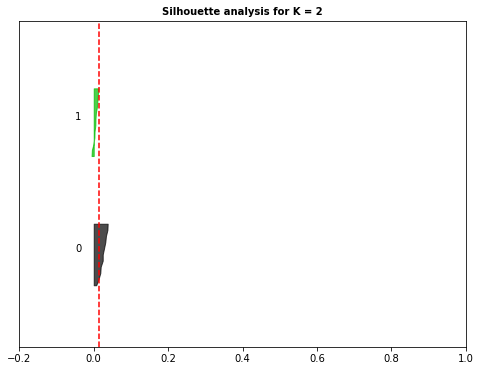

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


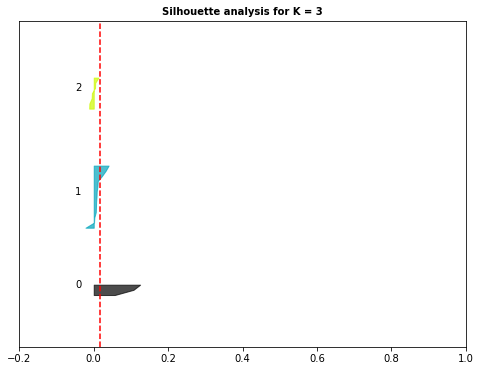

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


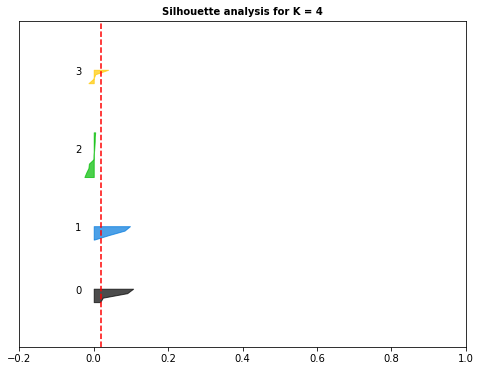

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


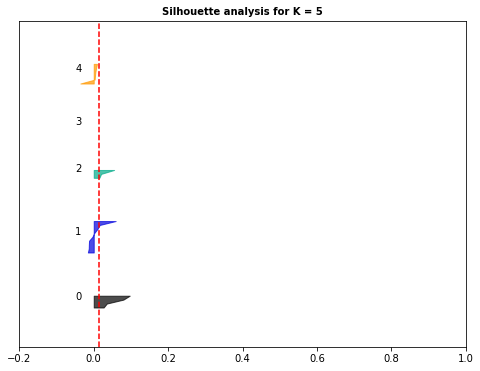

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


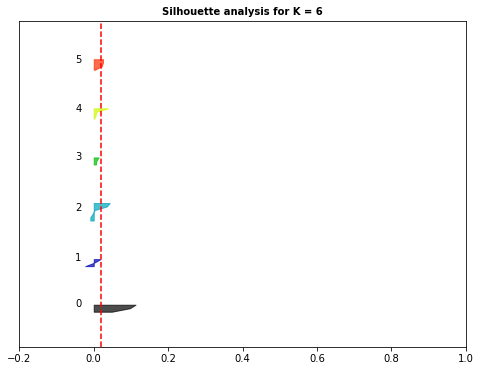

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


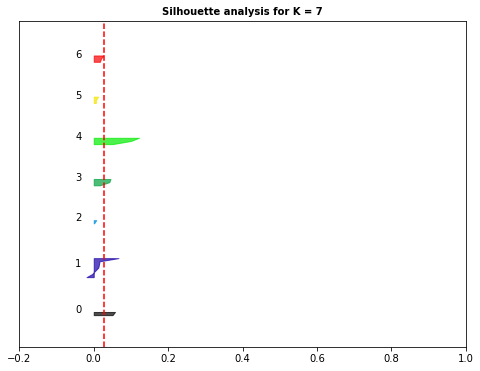

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


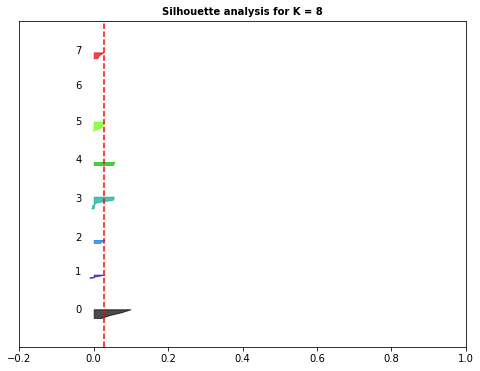

In [13]:
# Running Kmeans
k = 8
kmeans_results = run_KMeans(k, final_df)

# Plotting Silhouette Analysis
silhouette(kmeans_results, final_df, plot=True)

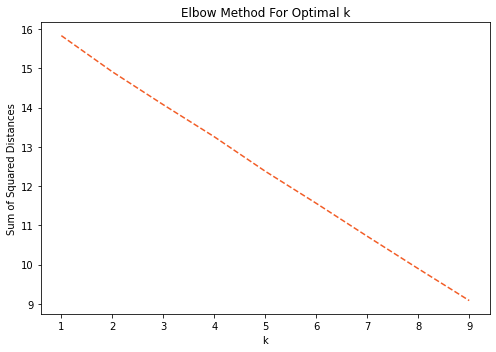

In [38]:
# Use the elbow method to automatically determine the best number of clusters (the number of design pattern categories to consider)?
# Source: https://github.com/broepke/TextClustering/blob/main/text_clustering.ipynb

from sklearn.cluster import KMeans

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['overview'])

Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(init="k-means++", n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.figure(figsize=(7,5))
ax = sns.lineplot(x=K, y=Sum_of_squared_distances)
#732F2F
ax.lines[0].set_linestyle("--")
ax.lines[0].set_color("#F25D27")

# Add a vertical line to show the optimum number of clusters
#plt.axvline(2, color='#1A2226', linestyle=':')

plt.xlabel('k')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')

plt.tight_layout()
plt.savefig('textclustering_elbow.png', dpi=300)
plt.show();

In [20]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


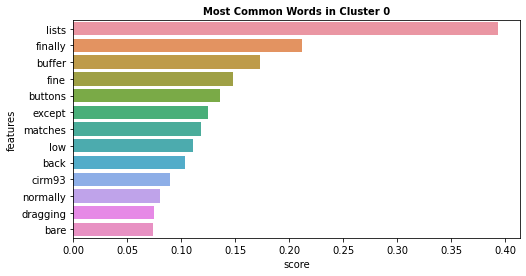

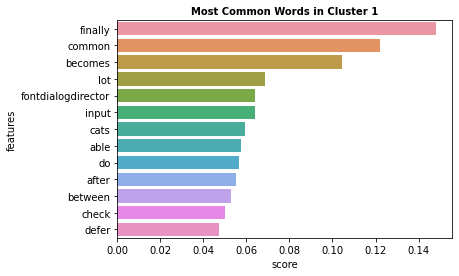

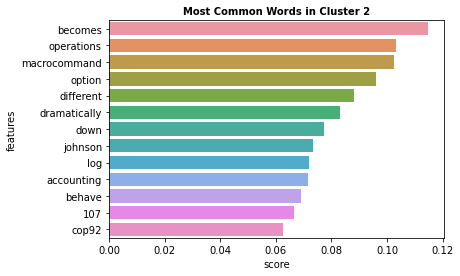

In [21]:
best_result = 3
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

In [22]:
# Transforms a centroids dataframe into a dictionary to be used on a WordCloud.
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

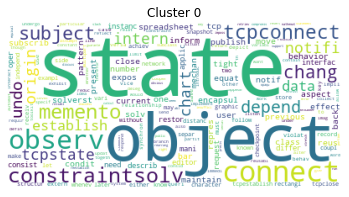

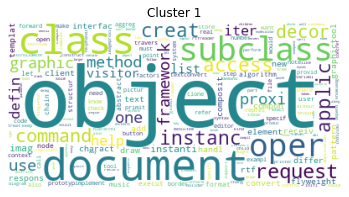

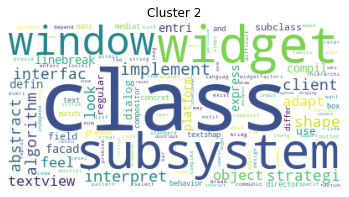

In [23]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)

In [24]:
# Assigning the cluster labels to each pattern
labels = kmeans.labels_ 
df['label'] = labels
df

,name,intent,motivation,applicability,Unnamed: 4,overview,label
0,abstract factory,Provide an interface for creating families of ...,Consider a user interface toolkit that support...,Use the Abstract Factory pattern when\n\n• a s...,NaN,Provide an interface for creating families of ...,2
1,builder,Separate the construction of a complex object ...,A reader for the RTF (Rich Text Format) docume...,Use the Builder pattern when\n\n• the algorith...,NaN,Separate the construction of a complex object ...,1
2,factory method,"Define an interface for creating an object, bu...",Frameworks use abstract classes to define and ...,Use the Factory Method pattern when\n\n• a cla...,NaN,"Define an interface for creating an object, bu...",1
3,prototype,Specify the kinds of objects to create using a...,You could build an editor for music scores by ...,Use the Prototype pattern when a system should...,NaN,Specify the kinds of objects to create using a...,1
4,singleton,"Ensure a class only has one instance, and prov...",It’s important for some classes to have exactl...,Use the Singleton pattern when\n\n• there must...,NaN,"Ensure a class only has one instance, and prov...",1
5,adapter,Convert the interface of a class into another ...,Sometimes a toolkit class that’s designed for ...,Use the Adapter pattern when\n\n• you want to ...,NaN,Convert the interface of a class into another ...,2
6,bridge,Decouple an abstraction from its implementatio...,When an abstraction can have one of several po...,Use the Bridge pattern when\n\n• you want to a...,NaN,Decouple an abstraction from its implementatio...,2
7,composite,Compose objects into tree structures to repres...,Graphics applications like drawing editors and...,Use the Composite pattern when\n\n• you want t...,NaN,Compose objects into tree structures to repres...,1
8,decorator,Attach additional responsibilities to an objec...,Sometimes we want to add responsibilities to i...,Use Decorator\n\n• to add responsibilities to ...,NaN,Attach additional responsibilities to an objec...,1
9,facade,Provide a unified interface to a set of interf...,Structuring a system into subsystems helps red...,Use the Facade pattern when\n\n• you want to p...,NaN,Provide a unified interface to a set of interf...,2


In [25]:
print("Cluster centroids: \n")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
tempk = 3
for i in range(tempk):
  print("Cluster %d:" % i)
  for j in order_centroids[i, :10]: #print out 10 features terms of each cluster
    print('%s'% terms[j])
  print('------------------')

Cluster centroids: 

Cluster 0:
lists
finally
buffer
fine
buttons
except
matches
low
back
cirm93
------------------
Cluster 1:
finally
common
becomes
lot
fontdialogdirector
input
cats
able
do
after
------------------
Cluster 2:
becomes
operations
macrocommand
option
different
dramatically
down
johnson
log
accounting
------------------


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [26]:
!pip install fuzzy-c-means
from fcmeans import FCM

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: typer
    Found existing installation: typer 0.7.0
    Uninstalling typer-0.7.0:
      Successfully uninstalled typer-0.7.0


In [27]:
my_model = FCM(n_clusters=3) # we use three cluster as an example
my_model.fit(final_df_array) ## X, numpy array. rows:samples columns:features
centers = my_model.centers
fuzzLabels = my_model.predict(final_df_array)

df['fuzzLabels'] = fuzzLabels
df

,name,intent,motivation,applicability,Unnamed: 4,overview,label,fuzzLabels
0,abstract factory,Provide an interface for creating families of ...,Consider a user interface toolkit that support...,Use the Abstract Factory pattern when\n\n• a s...,NaN,Provide an interface for creating families of ...,2,2
1,builder,Separate the construction of a complex object ...,A reader for the RTF (Rich Text Format) docume...,Use the Builder pattern when\n\n• the algorith...,NaN,Separate the construction of a complex object ...,1,1
2,factory method,"Define an interface for creating an object, bu...",Frameworks use abstract classes to define and ...,Use the Factory Method pattern when\n\n• a cla...,NaN,"Define an interface for creating an object, bu...",1,1
3,prototype,Specify the kinds of objects to create using a...,You could build an editor for music scores by ...,Use the Prototype pattern when a system should...,NaN,Specify the kinds of objects to create using a...,1,1
4,singleton,"Ensure a class only has one instance, and prov...",It’s important for some classes to have exactl...,Use the Singleton pattern when\n\n• there must...,NaN,"Ensure a class only has one instance, and prov...",1,2
5,adapter,Convert the interface of a class into another ...,Sometimes a toolkit class that’s designed for ...,Use the Adapter pattern when\n\n• you want to ...,NaN,Convert the interface of a class into another ...,2,2
6,bridge,Decouple an abstraction from its implementatio...,When an abstraction can have one of several po...,Use the Bridge pattern when\n\n• you want to a...,NaN,Decouple an abstraction from its implementatio...,2,2
7,composite,Compose objects into tree structures to repres...,Graphics applications like drawing editors and...,Use the Composite pattern when\n\n• you want t...,NaN,Compose objects into tree structures to repres...,1,2
8,decorator,Attach additional responsibilities to an objec...,Sometimes we want to add responsibilities to i...,Use Decorator\n\n• to add responsibilities to ...,NaN,Attach additional responsibilities to an objec...,1,2
9,facade,Provide a unified interface to a set of interf...,Structuring a system into subsystems helps red...,Use the Facade pattern when\n\n• you want to p...,NaN,Provide a unified interface to a set of interf...,2,2


In [28]:
# initialize test data
data = ["Design a drawing editor. A design is composed of te graphics (lines, rectangles and roses), positioned at precise positions. Each graphic form must be modeled by a class that provides a method draw(): void. A rose is a complex graphic designed by a black-box class component. This component performs this drawing in memory, and provides access through a method getRose(): int that returns the address of the drawing. It is probable that the system evolves in order to draw circles."]

# Create test data frame
#dfTest = pd.DataFrame(data, columns=['TestDesignProblem'])
#corpusTest = dfTest['TestDesignProblem'].tolist()
#corpusTest[0][0:447]

# Append the problem to the existing data frame of patterns, with the problem statement written to the 'overview' column and the other columns left blank
#new_row = {'category_id':0, 'name':'design_problem', 'intent':'', 'problem':'', 'discussion':'', 'structure':'', 'overview':data[0]}
new_row = {'category_id':0, 'name':'design_problem', 'overview':data[0]}

#append row to the dataframe
dfTest = df.append(new_row, ignore_index=True)
corpusTest = dfTest['overview'].tolist()
#corpusTest[24][0:200]

In [29]:
corpusTest = processCorpus(corpusTest, language)
#corpusTest[26][0:460]

In [30]:
vectorizer_test = TfidfVectorizer()
X_test = vectorizer_test.fit_transform(corpusTest)
tf_idf_test = pd.DataFrame(data = X_test.toarray(), columns=vectorizer_test.get_feature_names())

final_df_test = tf_idf_test

print("{} rows".format(final_df_test.shape[0]))
final_df_test.T.nlargest(5, 0)

24 rows


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
feel,0.437018,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
widget,0.420476,0.03381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.303957,0.0,0.0,0.0,0.0,0.0,0.0,0.0
look,0.386760,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031709,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
and,0.218509,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
motif,0.218509,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
# kmeans for test problem
k = 8
kmeans_results = run_KMeans(k, final_df_test)

kmeans = kmeans_results.get(3)
prediction = kmeans.predict(final_df_test)
labels = kmeans.labels_ 
dfTest['kmeans'] = labels

# hierarcial for test problem
ward = AgglomerativeClustering(n_clusters=3, linkage="ward").fit(final_df_test)
dfTest['hward'] = ward.labels_

# fuzzMeans for test problem
my_model = FCM(n_clusters=3) # we use three clusters as an example
my_model.fit(final_df_test.to_numpy()) # parameter: numpy array. rows:samples columns:features
centers = my_model.centers
fuzzLabels = my_model.predict(final_df_test.to_numpy())

dfTest['fuzzLabels'] = fuzzLabels
dfTest

,name,intent,motivation,applicability,Unnamed: 4,overview,label,fuzzLabels,category_id,kmeans,hward
0,abstract factory,Provide an interface for creating families of ...,Consider a user interface toolkit that support...,Use the Abstract Factory pattern when\n\n• a s...,NaN,Provide an interface for creating families of ...,2.0,1,NaN,2,0
1,builder,Separate the construction of a complex object ...,A reader for the RTF (Rich Text Format) docume...,Use the Builder pattern when\n\n• the algorith...,NaN,Separate the construction of a complex object ...,1.0,1,NaN,2,2
2,factory method,"Define an interface for creating an object, bu...",Frameworks use abstract classes to define and ...,Use the Factory Method pattern when\n\n• a cla...,NaN,"Define an interface for creating an object, bu...",1.0,1,NaN,1,2
3,prototype,Specify the kinds of objects to create using a...,You could build an editor for music scores by ...,Use the Prototype pattern when a system should...,NaN,Specify the kinds of objects to create using a...,1.0,1,NaN,0,0
4,singleton,"Ensure a class only has one instance, and prov...",It’s important for some classes to have exactl...,Use the Singleton pattern when\n\n• there must...,NaN,"Ensure a class only has one instance, and prov...",1.0,1,NaN,1,0
5,adapter,Convert the interface of a class into another ...,Sometimes a toolkit class that’s designed for ...,Use the Adapter pattern when\n\n• you want to ...,NaN,Convert the interface of a class into another ...,2.0,1,NaN,0,0
6,bridge,Decouple an abstraction from its implementatio...,When an abstraction can have one of several po...,Use the Bridge pattern when\n\n• you want to a...,NaN,Decouple an abstraction from its implementatio...,2.0,1,NaN,1,0
7,composite,Compose objects into tree structures to repres...,Graphics applications like drawing editors and...,Use the Composite pattern when\n\n• you want t...,NaN,Compose objects into tree structures to repres...,1.0,1,NaN,0,0
8,decorator,Attach additional responsibilities to an objec...,Sometimes we want to add responsibilities to i...,Use Decorator\n\n• to add responsibilities to ...,NaN,Attach additional responsibilities to an objec...,1.0,1,NaN,0,0
9,facade,Provide a unified interface to a set of interf...,Structuring a system into subsystems helps red...,Use the Facade pattern when\n\n• you want to p...,NaN,Provide a unified interface to a set of interf...,2.0,1,NaN,1,0


In [32]:
n = dfTest.index[-1]
problemRow = dfTest.iloc[[n]]


# Using drop() function to delete last row
dfTest.drop(index=n,axis=0,inplace=True)
problemRow

,name,intent,motivation,applicability,Unnamed: 4,overview,label,fuzzLabels,category_id,kmeans,hward
23,design_problem,NaN,NaN,NaN,NaN,Design a drawing editor. A design is composed ...,NaN,1,0.0,0,0


In [33]:
# Pattern Selection

# Get the candidate patterns:
candidates = dfTest.loc[dfTest['hward'].isin(problemRow['hward'])]
candidates

,name,intent,motivation,applicability,Unnamed: 4,overview,label,fuzzLabels,category_id,kmeans,hward
0,abstract factory,Provide an interface for creating families of ...,Consider a user interface toolkit that support...,Use the Abstract Factory pattern when\n\n• a s...,NaN,Provide an interface for creating families of ...,2.0,1,NaN,2,0
3,prototype,Specify the kinds of objects to create using a...,You could build an editor for music scores by ...,Use the Prototype pattern when a system should...,NaN,Specify the kinds of objects to create using a...,1.0,1,NaN,0,0
4,singleton,"Ensure a class only has one instance, and prov...",It’s important for some classes to have exactl...,Use the Singleton pattern when\n\n• there must...,NaN,"Ensure a class only has one instance, and prov...",1.0,1,NaN,1,0
5,adapter,Convert the interface of a class into another ...,Sometimes a toolkit class that’s designed for ...,Use the Adapter pattern when\n\n• you want to ...,NaN,Convert the interface of a class into another ...,2.0,1,NaN,0,0
6,bridge,Decouple an abstraction from its implementatio...,When an abstraction can have one of several po...,Use the Bridge pattern when\n\n• you want to a...,NaN,Decouple an abstraction from its implementatio...,2.0,1,NaN,1,0
7,composite,Compose objects into tree structures to repres...,Graphics applications like drawing editors and...,Use the Composite pattern when\n\n• you want t...,NaN,Compose objects into tree structures to repres...,1.0,1,NaN,0,0
8,decorator,Attach additional responsibilities to an objec...,Sometimes we want to add responsibilities to i...,Use Decorator\n\n• to add responsibilities to ...,NaN,Attach additional responsibilities to an objec...,1.0,1,NaN,0,0
9,facade,Provide a unified interface to a set of interf...,Structuring a system into subsystems helps red...,Use the Facade pattern when\n\n• you want to p...,NaN,Provide a unified interface to a set of interf...,2.0,1,NaN,1,0
14,interpreter,"Given a language, define a represention for it...",If a particular kind of problem occurs often e...,Use the Interpreter pattern when there is a la...,NaN,"Given a language, define a represention for it...",2.0,1,NaN,1,0
15,iterator,Provide a way to access the elements of an agg...,An aggregate object such as a list should give...,Use the Iterator pattern\n\n• to access an agg...,NaN,Provide a way to access the elements of an agg...,1.0,2,NaN,2,0


In [34]:
# # Append the problem row to the new DataFrame of candidate patterns
# candidates = candidates.append(problemRow, ignore_index = True)

# # Now perform ML again using different clusters.
# # fuzzMeans for test problem
# my_model = FCM(n_clusters=3) # we use three clusters as an example
# my_model.fit(candidates.to_numpy()) # parameter: numpy array. rows:samples columns:features
# centers = my_model.centers
# fuzzLabels = my_model.predict(candidates.to_numpy())

# candidates['fuzzLabelsSelect'] = fuzzLabels
# candidates

# First, perform preprocessing.

# processedProblem = problemRow['overview'].tolist()
# processedProblem = processCorpus(processedProblem, language)
# X_test = vectorizer_test.fit_transform(processedProblem)
# processedProblem = pd.DataFrame(data = X_test.toarray(), columns=vectorizer_test.get_feature_names())

# processedPatterns = candidates['overview'].tolist()
# processedPatterns = processCorpus(processedPatterns, language)
# X_test = vectorizer_test.fit_transform(processedPatterns)
# processedPatterns = pd.DataFrame(data = X_test.toarray(), columns=vectorizer_test.get_feature_names())

#from numpy.linalg import norm

# Use the cosine similarity measure to find the best pattern(s) for the problem.

#A = pd.to_numeric(processedPatterns['overview'])
#B = pd.to_numeric(processedProblem['overview'])

#cosine = np.dot(A,B)/(norm(A, axis=1)*norm(B))
#cosine

# Source: https://sites.temple.edu/tudsc/2017/03/30/measuring-similarity-between-texts-in-python/

import string

#documents = [ candidates.iloc[0]['overview'], problemRow.iloc[0]['overview'] ]
documents = []
for index, rows in candidates.iterrows():
    my_list = rows['overview']
    documents.append(my_list)
documents.append(problemRow.iloc[0]['overview'])

nltk.download('wordnet')
nltk.download('omw-1.4')
lemmer = nltk.stem.WordNetLemmatizer()
def LemTokens(tokens):
    return [lemmer.lemmatize(token) for token in tokens]
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

from sklearn.feature_extraction.text import TfidfVectorizer
TfidfVec = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english')
def cos_similarity(textlist):
    tfidf = TfidfVec.fit_transform(textlist)
    return (tfidf * tfidf.T).toarray()
sim_matrix = cos_similarity(documents)
sim_matrix

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(


array([[1.        , 0.10978745, 0.10187434, 0.16213497, 0.15804907,
        0.11384109, 0.11618524, 0.09436712, 0.057971  , 0.11235303,
        0.26189894, 0.10841905, 0.14316763, 0.03788076],
       [0.10978745, 1.        , 0.18112187, 0.13239334, 0.08133843,
        0.17448676, 0.14144246, 0.04060052, 0.06016205, 0.08143567,
        0.08787509, 0.08318341, 0.12053404, 0.09382399],
       [0.10187434, 0.18112187, 1.        , 0.12867214, 0.11568121,
        0.08848473, 0.09301092, 0.07109042, 0.06684055, 0.10463646,
        0.05706552, 0.0815726 , 0.10444747, 0.0359617 ],
       [0.16213497, 0.13239334, 0.12867214, 1.        , 0.13872456,
        0.17003214, 0.24263366, 0.10414763, 0.04960679, 0.12545169,
        0.11388544, 0.12020506, 0.15297476, 0.0770406 ],
       [0.15804907, 0.08133843, 0.11568121, 0.13872456, 1.        ,
        0.11229364, 0.10569851, 0.09181104, 0.05653168, 0.10743998,
        0.08935265, 0.10447569, 0.11150352, 0.02134151],
       [0.11384109, 0.17448676, 0.0

In [35]:
# Find the highest cosine similarity to the design problem in the similarity matrix.
# That index corresponds to the best pattern for the design problem.
# Also include runners-up.

indices = []

i = 0
for sim in sim_matrix[len(sim_matrix)-1][:-1]:
  indices.append((i, sim))
  i += 1

#indices

sorted_patterns = sorted(indices,key=lambda x: x[1], reverse=True)
#sorted_patterns

best_pattern_names = []
for i in range(len(sorted_patterns)):
  best_pattern_names.append(candidates.iloc[sorted_patterns[i][0]]['name'])
best_pattern_names

['composite',
 'prototype',
 'decorator',
 'adapter',
 'iterator',
 'abstract factory',
 'singleton',
 'facade',
 'visitor',
 'bridge',
 'strategy',
 'mediator',
 'interpreter']

In [36]:
print("Cluster centroids: \n")
k_order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
f_order_centroids = my_model.centers.argsort()[:, ::-1]

#my_model.
k_order_centroids

Cluster centroids: 



array([[ 266,  394,  162, ...,  929,  759,  240],
       [ 140,  258,   24, ...,  949,  126,  968],
       [ 619,  904,  795, ...,  990, 1055,  162]])